In [1]:
## Manipulación de datos
import pandas as pd
import numpy as np

## Visualización
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Modelos
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r'..\..\data\processed\Merch_ML.csv',index_col='Order_ID')
df.head()

,Order_Date,Buyer_Age,Sales_Price,Shipping_Charges,Sales_per_Unit,Quantity,Total_Sales,Rating,Product_ID,Order_Location,International_Shipping,Buyer_Gender,Product_Category_Clothing,Product_Category_Ornaments,Product_Category_Other
Order_ID,,,,,,,,,,,,,,,
189440,2024-07-21,30,100,0,100,1,100,4,0,15,0,1,1.0,0.0,0.0
187385,2024-07-20,32,100,0,100,1,100,3,0,6,0,1,1.0,0.0,0.0
181844,2024-07-21,26,9,40,49,1,49,2,1,1,1,0,0.0,0.0,1.0
197934,2024-08-19,28,9,0,9,2,18,3,1,18,0,1,0.0,0.0,1.0
122470,2024-01-06,19,10,0,10,3,30,5,2,11,0,0,0.0,0.0,1.0


In [3]:
df2 = pd.read_csv(r'..\..\data\raw\merch_sales.csv')
df2['Review_len'] = df2['Review'].apply(lambda x: len(x))
df_review = df2[['Order ID','Review_len']]
df_review['Order_ID'] = df_review['Order ID']
df_review.set_index('Order_ID',inplace=True)

In [4]:
df = pd.concat([df,df_review],axis=1)

In [5]:
df.drop(columns=['Order ID'],inplace=True)

In [6]:
df['Rating'] = df['Rating'].apply(lambda x: 1 if x <=2 else 2 if x == 3 else 3)
# 1-2 = Low
# 3 = Medium
# 4-5 = high

In [7]:
df['Rating'].value_counts()

Rating
3    4430
1    1847
2    1117
Name: count, dtype: int64

Vemos que hay un desbalance entre los valores de la target, tambien agrupamos para poder predecir mejor la target. Agregamos la longitud del texto de la review, suele estar muy relacionado con el rating.

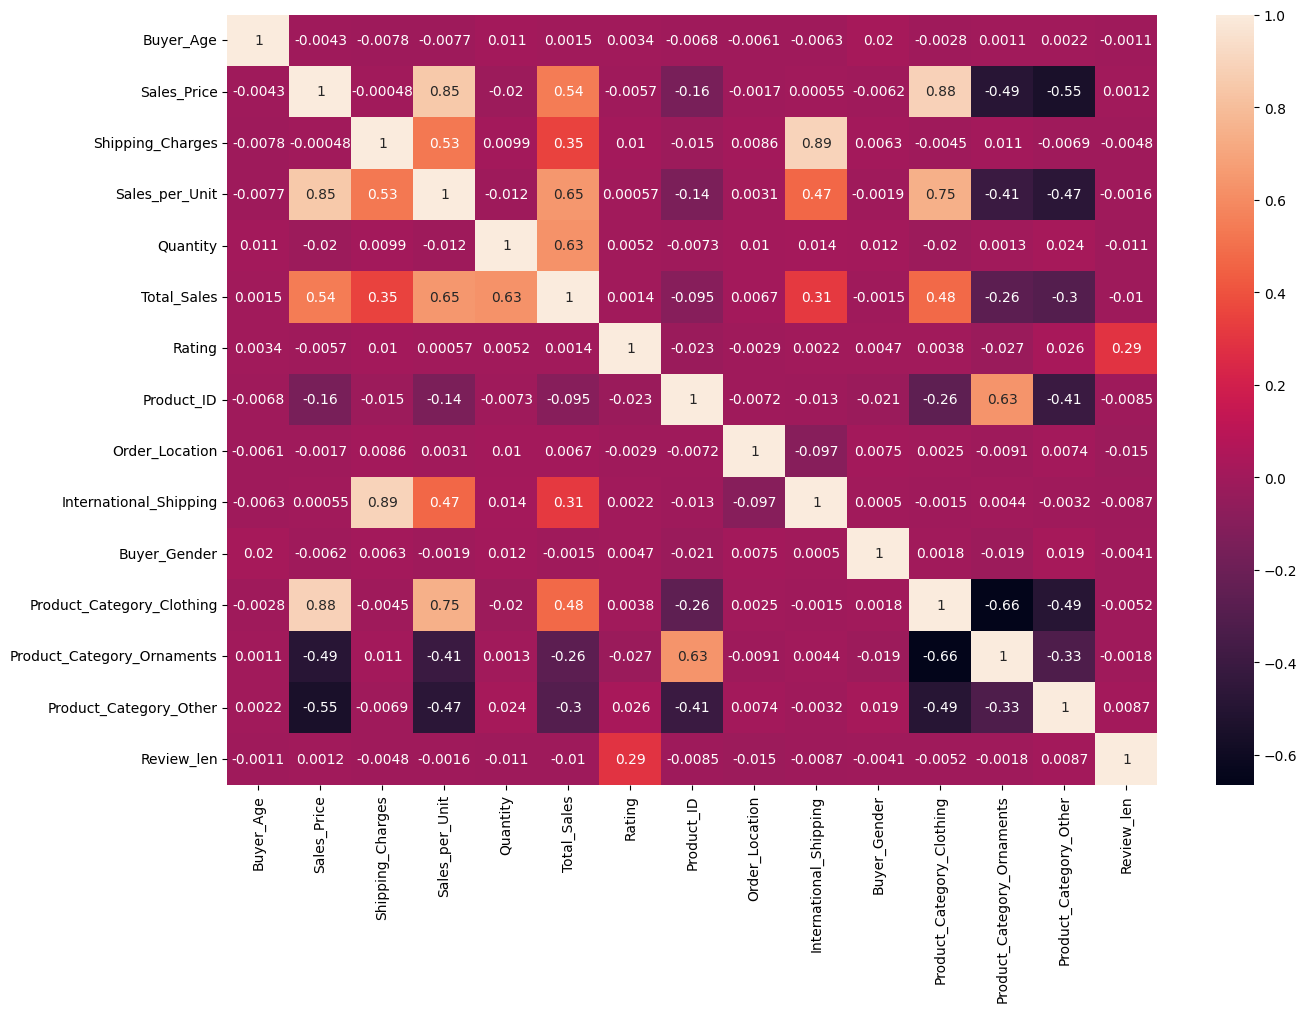

In [ ]:
df_corr = df.drop(columns='Order_Date')
df_corr = df_corr.corr()

plt.figure(figsize=(15,10))

sns.heatmap(df_corr,annot=True,cmap='coolwarm');

In [9]:
X = df.drop(columns=['Order_Date','Rating'])
y = df['Rating']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [12]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.58      0.32      0.41       379
           2       0.89      0.82      0.85       228
           3       0.75      0.91      0.82       872

    accuracy                           0.75      1479
   macro avg       0.74      0.69      0.70      1479
weighted avg       0.73      0.75      0.72      1479



Aunque practicamente, no hay variables con alta corr con la target, al añadir la columna review con la longitud de las letras, el modelo mejoro mucho debiado a la corr que existe entre ellas.